In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/CAvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/FR_category_id.json


In [4]:
IN_data = pd.read_csv("/kaggle/input/youtube-new/INvideos.csv")


In [5]:
IN_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [6]:
IN_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [7]:
IN_data = IN_data.drop(['description'], axis= 1)

In [8]:
IN_data['trending_date'] = pd.to_datetime(IN_data['trending_date'], format='%y.%d.%m').dt.date
publish_data = pd.to_datetime(IN_data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
IN_data['publish_date'] = publish_data.dt.date
IN_data['publish_time'] = publish_data.dt.time
IN_data['publish_hour'] = publish_data.dt.hour

In [9]:
IN_videos_categories = pd.read_json("/kaggle/input/youtube-new/IN_category_id.json")
categories = {category['id']: category['snippet']['title'] for category in IN_videos_categories['items']}

IN_data.insert(4, 'category', IN_data['category_id'].astype(str).map(categories))
IN_data.tail()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_date,publish_hour
37347,iNHecA3PJCo,2018-06-14,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,Comedy,23,08:01:11,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,2018-06-13,8
37348,dpPmPbhcslM,2018-06-14,Seetha | Flowers | Ep# 364,Flowers TV,Entertainment,24,11:30:04,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,2018-06-13,11
37349,mV6aztP58f8,2018-06-14,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,Entertainment,24,05:00:02,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,2018-06-13,5
37350,qxqDNP1bDEw,2018-06-14,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,Entertainment,24,15:07:49,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,2018-06-13,15
37351,wERgpPK44w0,2018-06-14,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Suresh Productions,Entertainment,24,04:29:54,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,2018-06-10,4


In [10]:
IN_videos_copy = IN_data.copy()
IN_videos_copy['dislike_percentage'] = (IN_data['dislikes'] / (IN_data['dislikes'] + IN_data['likes'])) * 100
print(IN_videos_copy['dislike_percentage'].head(5))

0     2.295478
1    55.155583
2    10.780834
3     2.256276
4    37.324841
Name: dislike_percentage, dtype: float64


In [11]:
def numberOfUpper(string):
    count = 0
    for word in string.split():
        if word.isupper():
            count += 1
    return(count)

IN_videos_copy['all_upper_in_title'] = IN_data['title'].apply(numberOfUpper)
print(IN_videos_copy['all_upper_in_title'].tail(5))

37347    0
37348    0
37349    2
37350    0
37351    0
Name: all_upper_in_title, dtype: int64


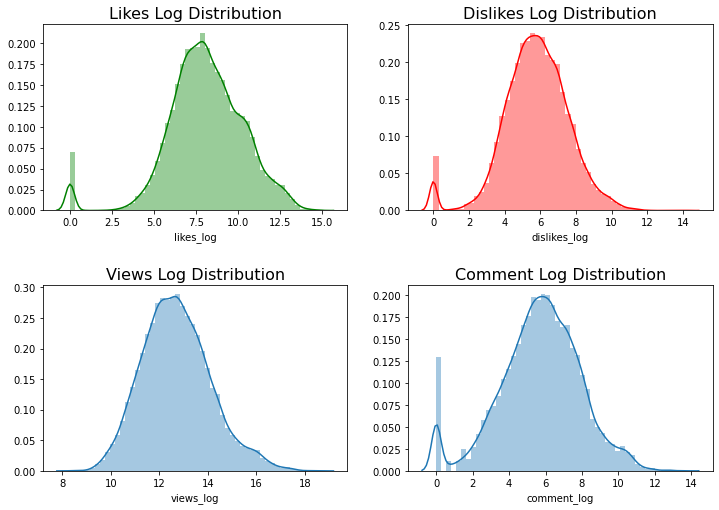

In [12]:
IN_videos_copy['likes_log'] = np.log(IN_data['likes'] + 1)
IN_videos_copy['dislikes_log'] = np.log(IN_data['dislikes'] + 1)
IN_videos_copy['views_log'] = np.log(IN_data['views'] + 1)
IN_videos_copy['comment_log'] = np.log(IN_data['comment_count'] + 1)

plt.figure(figsize = (12,8))

plt.subplot(221)
g1 = sns.distplot(IN_videos_copy['likes_log'], color = 'green')
g1.set_title("Likes Log Distribution", fontsize = 16)

plt.subplot(222)
g2 = sns.distplot(IN_videos_copy['dislikes_log'], color = 'r')
g2.set_title("Dislikes Log Distribution", fontsize = 16) 

plt.subplot(223)
g3 = sns.distplot(IN_videos_copy['views_log'])
g3.set_title("Views Log Distribution", fontsize = 16)

plt.subplot(224)
g4 = sns.distplot(IN_videos_copy['comment_log'])
g4.set_title("Comment Log Distribution", fontsize = 16)

plt.subplots_adjust(wspace = 0.2 , hspace = 0.4, top = 0.9)
plt.show()

In [13]:
IN_videos_last = IN_data.drop_duplicates(subset=['video_id'], keep='last', inplace=False)
IN_videos_copy = IN_data.drop_duplicates(subset = ['video_id'], keep = 'first', inplace = False)
print(IN_videos_last.head(2))

       video_id trending_date  \
12  Prb_osSVE0M    2017-11-14   
22  1kuJkA9usqg    2017-11-14   

                                                title channel_title  \
12  Renu Desai Gives Rating For Pawan kalyan As Hu...    ABN Telugu   
22                  Deivamagal Episode 1387, 13/11/17     VikatanTV   

           category  category_id publish_time  \
12  News & Politics           25     09:51:59   
22    Entertainment           24     15:00:01   

                                                 tags   views  likes  \
12  Resnu desai|"actress renu desai"|"pawan kalyan...  156085    716   
22  deivamagal|"deiva magal"|"deiva magal serial"|...  387221   2159   

    dislikes  comment_count                                  thumbnail_link  \
12        53              0  https://i.ytimg.com/vi/Prb_osSVE0M/default.jpg   
22      1214            711  https://i.ytimg.com/vi/1kuJkA9usqg/default.jpg   

    comments_disabled  ratings_disabled  video_error_or_removed publish_date  \
12 

In [14]:
print("IN_data dataset contains {} videos".format(IN_data.shape[0]))
print("IN_videos_first dataset contains {} videos".format(IN_videos_copy.shape[0]))
print("IN_videos_last dataset contains {} videos".format(IN_videos_last.shape[0]))

IN_data dataset contains 37352 videos
IN_videos_first dataset contains 16307 videos
IN_videos_last dataset contains 16307 videos


In [15]:
IN_data['days_before_trend'] = (IN_data.trending_date - IN_data.publish_date) / np.timedelta64(1,'D')
IN_data['days_before_trend'] = IN_data['days_before_trend'].astype(int)
IN_data.tail(3)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_date,publish_hour,days_before_trend
37349,mV6aztP58f8,2018-06-14,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,Entertainment,24,05:00:02,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,2018-06-13,5,1
37350,qxqDNP1bDEw,2018-06-14,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,Entertainment,24,15:07:49,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,2018-06-13,15,1
37351,wERgpPK44w0,2018-06-14,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Suresh Productions,Entertainment,24,04:29:54,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,2018-06-10,4,4


In [16]:
IN_data.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category                  105
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
publish_date                0
publish_hour                0
days_before_trend           0
dtype: int64

In [17]:
null_data = IN_data[IN_data['category'].isnull()]
null_data.head(2)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_date,publish_hour,days_before_trend
140,xzEbOteUiRY,2017-11-14,"ਅੰਮ੍ਰਿਤਸਰ” ਵਿੱਚ ਦੀਵਾਨ ਲਗਾਉਣਾ ਸਾਡਾ ਮਕਸਦ ਨਹੀਂ, ਸ...",Emm Pee,NaN,29,22:34:25,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",51575,0,0,0,https://i.ytimg.com/vi/xzEbOteUiRY/default.jpg,True,True,False,2017-11-12,22,2
198,OZU2E50G4KI,2017-11-14,ANUGRAH TV- 12-11-2017 Sunday Holy Communion M...,Ankur Narula Ministries,NaN,29,12:07:04,[none],17726,887,21,96,https://i.ytimg.com/vi/OZU2E50G4KI/default.jpg,False,False,False,2017-11-12,12,2


In [18]:
IN_data['category'].fillna("Nonprofits & Activism", inplace = True)
IN_data[IN_data['category_id'] == 29]
IN_data[IN_data['category_id'] == 29].tail(3)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_date,publish_hour,days_before_trend
35122,JcfZ268m7kc,2018-06-02,LIVE STREAMING | Dhilwan (Barnala) | Last Day ...,Emm Pee,Nonprofits & Activism,29,18:09:13,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",74665,2706,146,0,https://i.ytimg.com/vi/JcfZ268m7kc/default.jpg,True,False,False,2018-05-31,18,2
35267,6JNRoDQOZoc,2018-06-03,LIVE NOW | JUNE: MONTHLY DIWAN | 2 JUNE 2018 |...,Emm Pee,Nonprofits & Activism,29,18:18:28,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",57686,3278,156,0,https://i.ytimg.com/vi/6JNRoDQOZoc/default.jpg,True,False,False,2018-06-02,18,1
35473,6JNRoDQOZoc,2018-06-04,LIVE NOW | JUNE: MONTHLY DIWAN | 2 JUNE 2018 |...,Emm Pee,Nonprofits & Activism,29,18:18:28,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",87287,3594,194,0,https://i.ytimg.com/vi/6JNRoDQOZoc/default.jpg,True,False,False,2018-06-02,18,2


In [25]:
IN_data.loc[(IN_data['days_before_trend']<1), 'days_before_trend'] =1
IN_data['views_per_day'] = IN_data['views'].astype(int) / IN_data['days_before_trend']
IN_data['views_per_day'] = IN_data['views_per_day']
IN_data.head()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_date,publish_hour,days_before_trend,views_per_day
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,2017-11-12,12,2,548163.5
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,News & Politics,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,2017-11-13,5,1,590101.0
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,Entertainment,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,2017-11-12,15,2,236994.0
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,Comedy,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,2017-11-12,7,2,621340.0
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,Entertainment,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,2017-11-13,1,1,464015.0


In [20]:
IN_data.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category                  0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
publish_date              0
publish_hour              0
days_before_trend         0
views_per_day             0
dtype: int64

In [21]:
IN_data.to_csv("preprocessedIndia.csv", index=False)

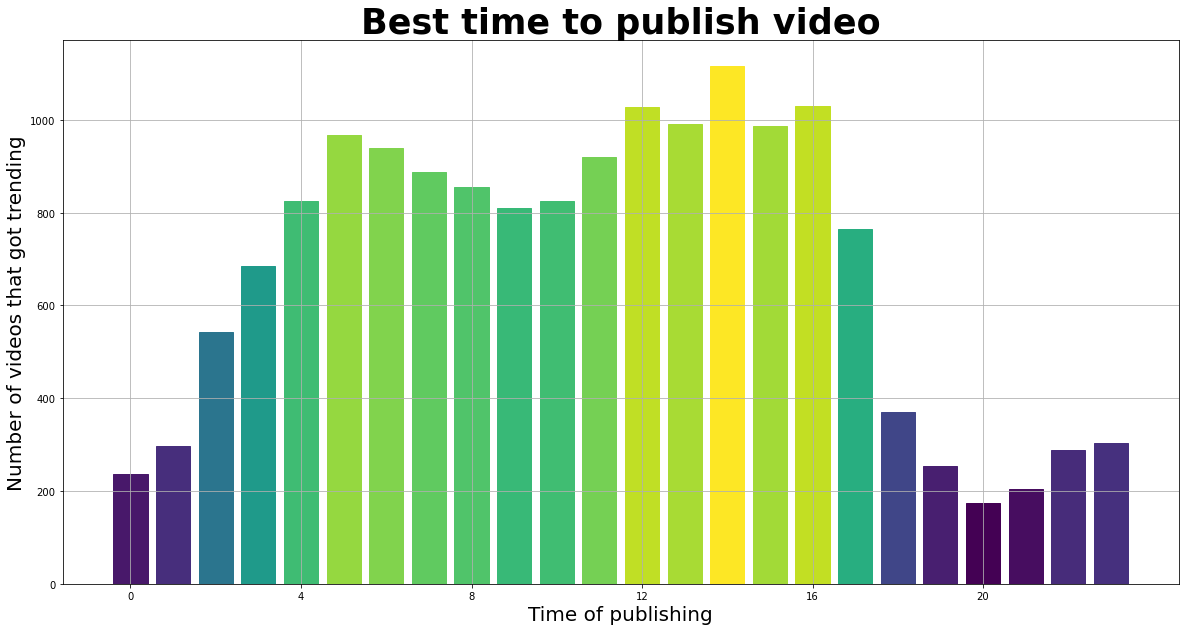

In [30]:
publish_h = [0] * 24

for index, row in IN_videos_copy.iterrows():
    publish_h[row['publish_hour']] += 1

values = publish_h
ind = np.arange(len(values))

# Creating new plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)

#Sampling of colormap
for i,b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values)) / (max(values) - min(values))))
    
plt.ylabel("Number of videos that got trending", fontsize = 20)
plt.xlabel('Time of publishing', fontsize = 20)
plt.title('Best time to publish video', fontsize = 35, fontweight = 'bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0,4,8,12,16,20])
plt.show()

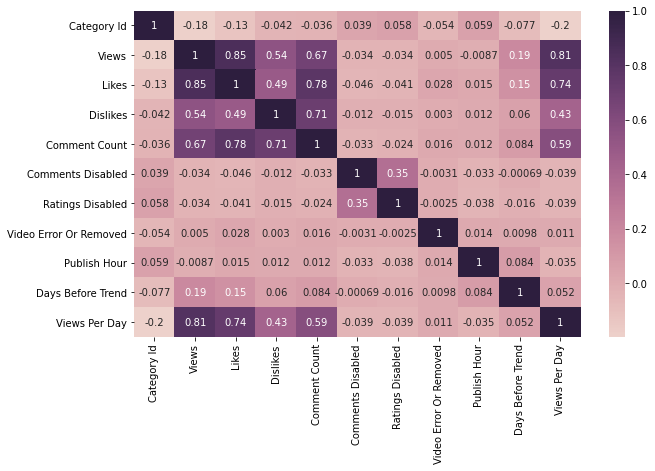

In [34]:
h_labels = [x.replace('_', ' ').title() for x in list(IN_data.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize = (10,6))
_ = sns.heatmap(IN_data.corr(), annot = True, xticklabels = h_labels, yticklabels = h_labels, cmap = sns.cubehelix_palette(as_cmap=True), ax=ax)

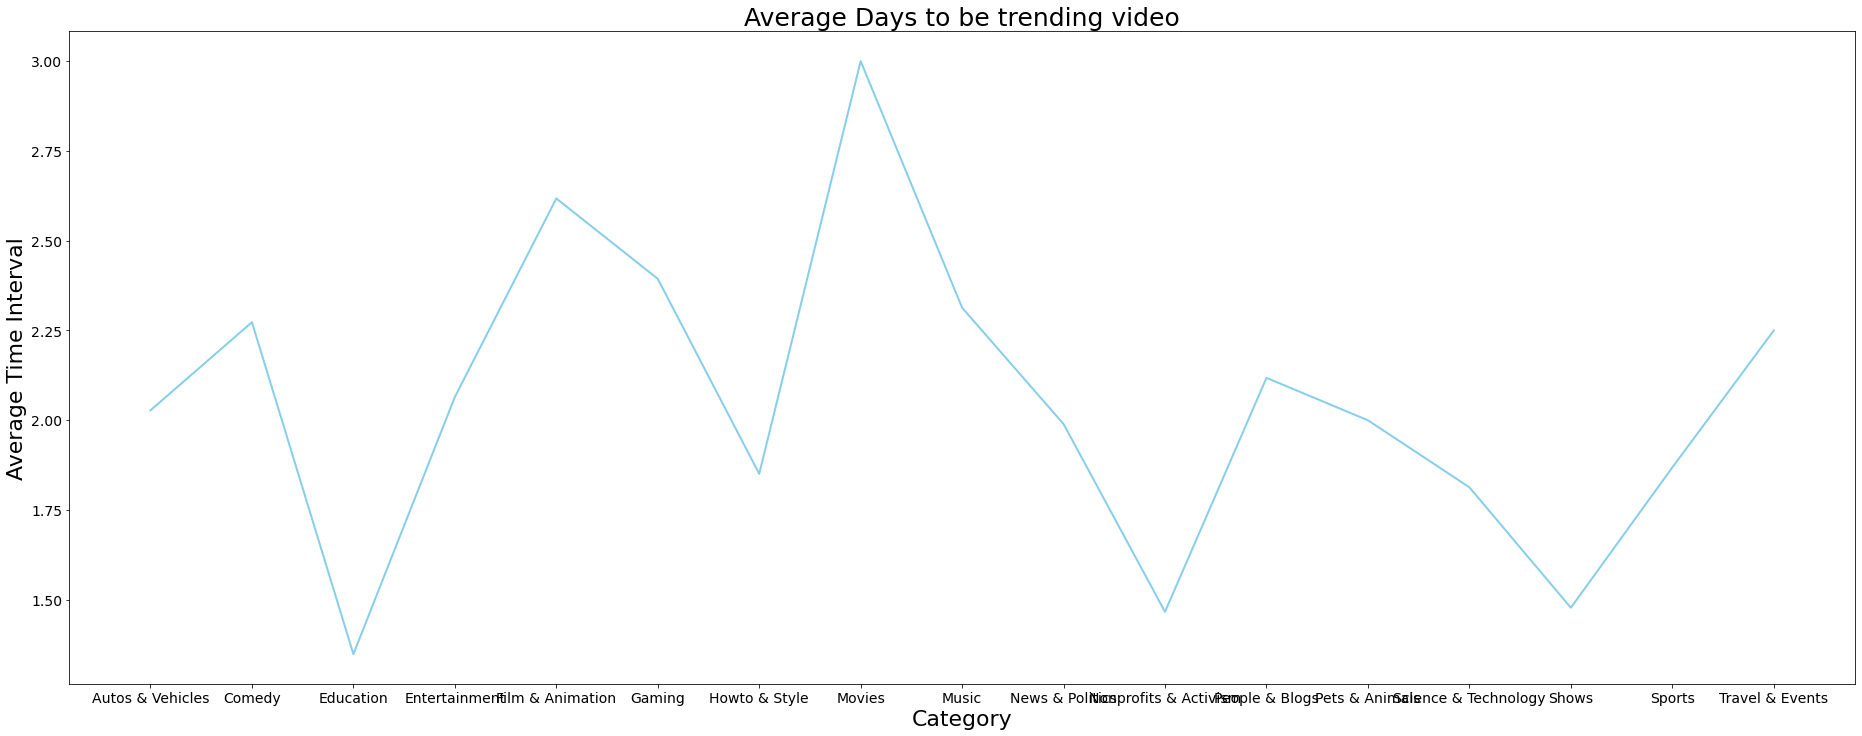

In [35]:
IN_data['interval'] = (pd.to_datetime(IN_data['trending_date']).dt.date - pd.to_datetime(IN_data['publish_date']).dt.date).astype('timedelta64[D]')
df_t = pd.DataFrame(IN_data['interval'].groupby(IN_data['category']).mean())
plt.figure(figsize = (32,12))
plt.plot(df_t, color='skyblue', linewidth=2)
plt.title("Average Days to be trending video", fontsize=25)
plt.xlabel('Category',fontsize=22)
plt.ylabel('Average Time Interval',fontsize=22)
plt.tick_params(labelsize=14)
plt.show();

In [36]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt


mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(str(IN_data["tags"]))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)

NameError: name 'in_videos' is not defined